In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import data

In [3]:
data = pd.read_csv('online_shoppers_intention.csv')

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data discription

- Administrative: Number of pages visited by the visitor about account management
- Administrative Duration: Total amount of time (in seconds) spent by the visitor on account management related pages
- Informational: Number of pages visited by the visitor about website, communication and address information of the shopping site
- Informational Duration: Total amount of time (in seconds) spent by the visitor on informational pages
- Product Related: Number of pages visited by visitor about product related pages
- Product Related Duration: Total amount of time (in seconds) spent by the visitor on product related pages
- Bounce Rate: Average bounce rate value of the pages visited by the visitor
- Exit Rate: Average exit rate value of the pages visited by the visitor
- Page Value: Average page value of the pages visited by the visitor
- Special Day: Closeness of the site visiting time to a special day
- Revenue: Whether the user is going to purchase from the site or not.

## 1. Analye the data 簡單檢查數據特性

#### 查看每個月的銷售成績(成功賣出)

<BarContainer object of 10 artists>

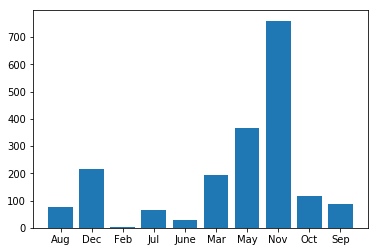

In [5]:
df = data[data['Revenue']== True ].groupby('Month')
df.sum().index
df.sum()['Revenue']
plt.bar(df.sum().index, df.sum()['Revenue'])

#### November 銷售量最好

In [6]:
df = data.groupby('Weekend')
df.sum()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
Weekend,,,,,,,,,,,,,,,
False,21449,750901.846634,4528,308524.003254,296515,1.123181e+07,221.723391,423.398390,54563.299256,598.6,20096,22663,29789,38553,1409.0
True,7097,245591.621316,1681,116520.663195,94734,3.499408e+06,51.896330,107.689206,18051.250191,158.8,6093,6400,9018,11625,499.0


([<matplotlib.axis.XTick at 0x1136507f0>,
 <a list of 2 Text xticklabel objects>)

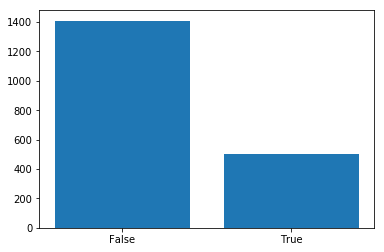

In [7]:
plt.bar(df.sum().index, df.sum()['Revenue'])
lable = ['False', 'True']
plt.xticks(df.sum().index, lable)

### 非週末買氣反而比較高，猜測因為週末只有兩天，所以總購買量就低。但是如果以平均而言，「單日」購買量週末的購買量也是低於平日。所以，也許大家比較不喜歡在週末網購，可能平日壓力大，比較想要購物，週末偏好實體店面。

In [8]:
perday_not_weekend = df.sum().loc[False,'Revenue']/5
perday_weekend = df.sum().loc[True,'Revenue']/2
print('not weekend sale number per day = '+ str(perday_not_weekend))
print('weekend sale number per day = '+ str(perday_weekend))

not weekend sale number per day = 281.8
weekend sale number per day = 249.5


## 2. Define my problem

### 題目：如果某公司要在該網站上，販賣商品，如何操控變因(減少特定資訊，週末促銷)才能把銷售量提到最高。也就是幫助公司創造最大利潤。

### Analyze the problem

#### 因為要銷售量最高，所以要思考什麼因素才能導致銷售成功。我的方法是把資料切割成三部分，使用者瀏覽區域，使用者重複瀏覽和離開速度，和使用裝置三個部分，分別分析。我將先使用Decision tree判斷是否有哪些因素可以有效提高銷售量。

### 第一步，根據使用者停留在哪些區段，決定哪些資訊最重要：

### 這個問題我將採用decision tree進行分析，因為考量到資料的特性，具有多個變因，所以用decision tree比較可以看出資料的分佈特性。

In [9]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:5], data['Revenue'], test_size=0.3, random_state=42)

In [10]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated
8077,0,0.0,0,0.0,5
1568,0,0.0,0,0.0,3
462,0,0.0,1,132.0,8
743,0,0.0,0,0.0,3
222,0,0.0,0,0.0,4


In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Visulaize

In [12]:
from sklearn.externals.six import StringIO 
import pydotplus
from sklearn import ensemble, metrics
from sklearn.tree import export_graphviz



dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(X_train),
                class_names=['not_buy','buy'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("Decison_tree_based_on_section.pdf")

True

In [13]:
dtree.feature_importances_

array([0.22375536, 0.06698048, 0.        , 0.05096008, 0.65830408])

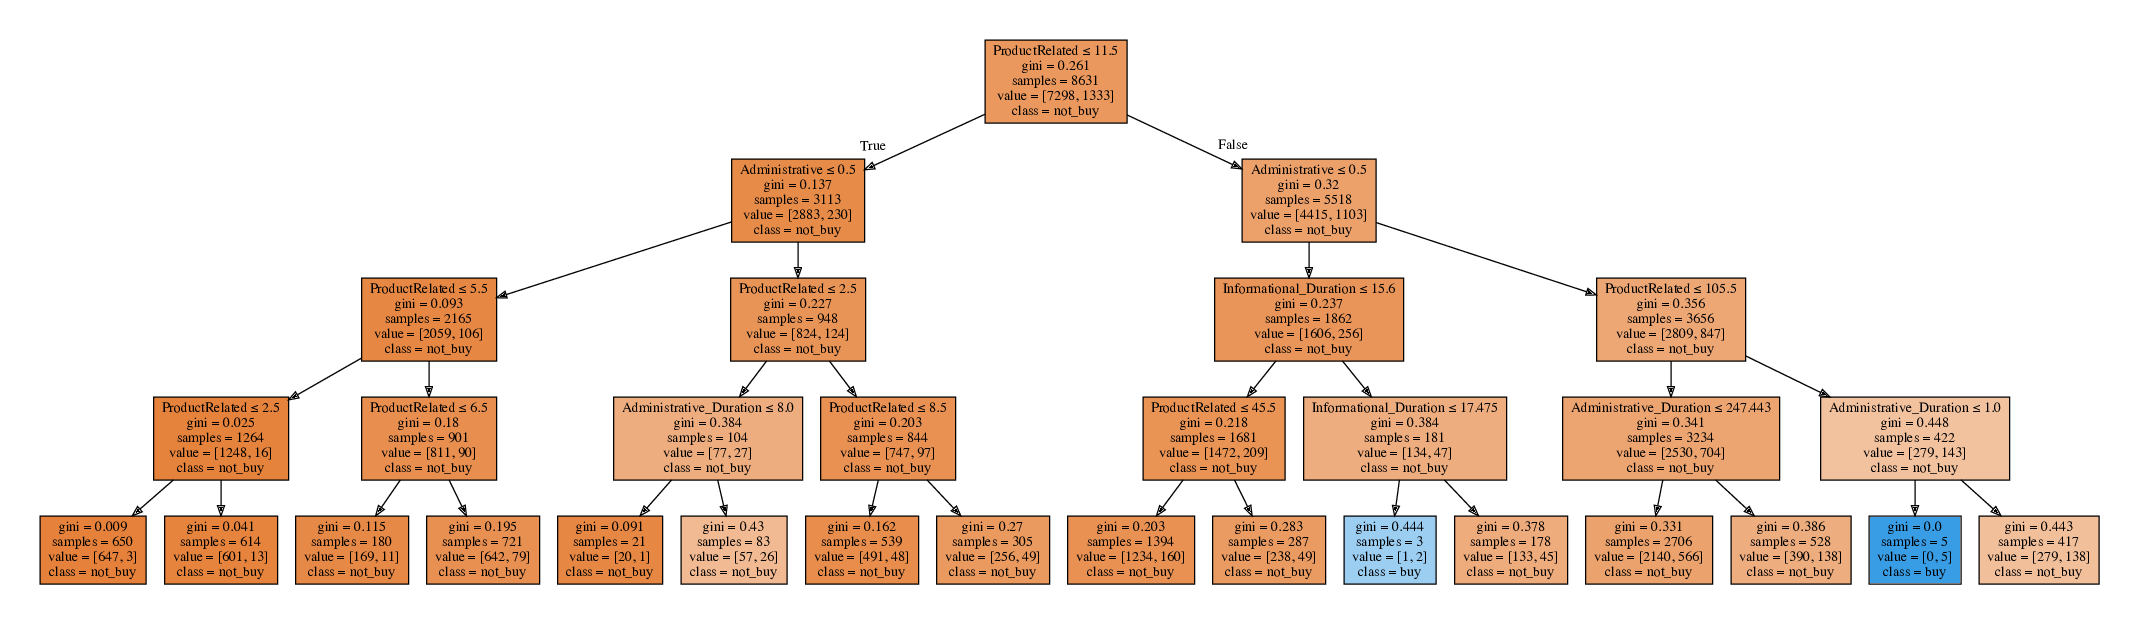

In [14]:
from wand.image import Image as WImage
img = WImage(filename = 'Decison_tree_based_on_section.pdf')
img

### Discussion

### 這個tree中只有兩個區段預測會購買，其中有兩點我覺得頗有意義

#### 第一，如果使用這停留在information區塊比較久，可以想像他們比較有可能會購買，但是一但停留超過17.475，消費這購買的機率會變低。回到定義的題目，如果我要促銷產品，針對的當然是停留比較久的消費者，但當系統發現停留時間過長，有可能使用者陷入猶豫，此時很有可能他們就不買了，因為根據個人消費經驗，購物一但陷入糾結，很有可能會放棄。此時，比須使用促銷的方式，例如告訴使用者，恭喜他被抽中為lucky person，所以商品特價。只要特價的範圍維持一定利潤，對公司就有幫助，因為賺得少總比沒賺好。

#### 第二，當使用者花比較少時間觀看帳號頁面時，使用這比較會購買，也許是因為這是比較不細心的購物者，他們比較急著購買，所以沒有太多的猶豫。針對這種使用者，就不用考慮降價，因為他們花比較多的時間在比較不同產品，所以他們應該比較關心的是功能，所以在頁面中應該強調產品效能。

### Prediction Result

In [15]:
y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.8445525817788592


### 第二步，用重複進入頁面，和離開速度來觀察數據

#### 此問題適合使用 SVM classification來處理

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, [6,7]], data['Revenue'], test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear' ,random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[3124,    0],
       [ 575,    0]])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8445525817788592

### training data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


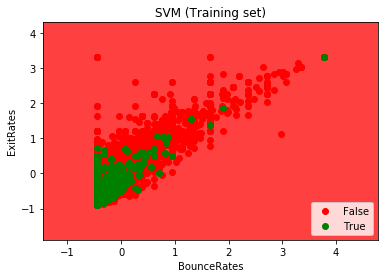

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('BounceRates')
plt.ylabel('ExitRates')
plt.legend()
plt.show()


### testing data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


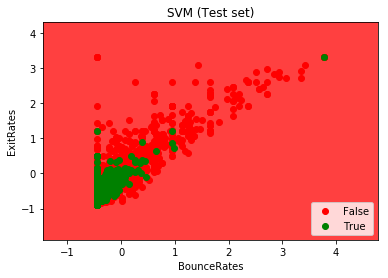

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('BounceRates')
plt.ylabel('ExitRates')
plt.legend()
plt.show()

### Discussion

### 用CVM方法發現因為沒買的人佔據資料大部分的數據，所以即使model把全部都預測為不會買，正確率也會有八成，所以其實使用這個方法對公司並沒有太大意義。

### 第三部分，關於使用者使用的平台(OperatingSystem Browser	Region)，也會使用decison tree方式呈現

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 11:14], data['Revenue'], test_size=0.3, random_state=42)

In [25]:
X_train.head()

,OperatingSystems,Browser,Region
8077,3,2,1
1568,3,2,8
462,3,2,4
743,1,8,2
222,3,2,1


In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Visulaize

In [27]:
from sklearn.externals.six import StringIO 
import pydotplus
from sklearn import ensemble, metrics
from sklearn.tree import export_graphviz



dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(X_train),
                class_names=['not_buy','buy'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("Decison_tree_based_on_platform.pdf")

True

In [28]:
dtree.feature_importances_

array([0.62091873, 0.24116884, 0.13791243])

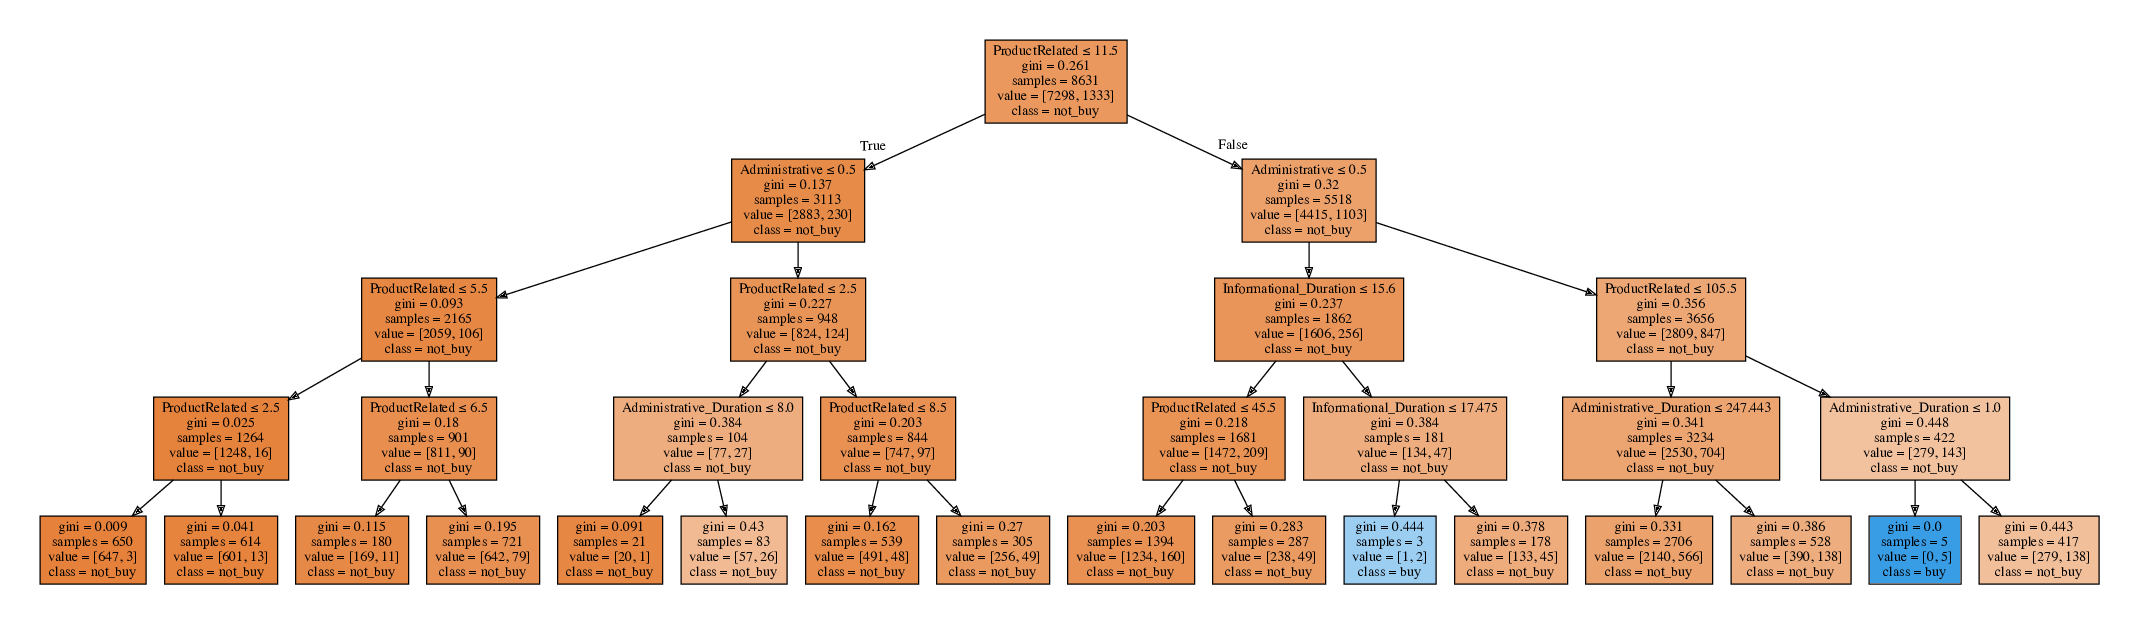

In [29]:
from wand.image import Image as WImage
from wand.display import display
WImage(filename = 'Decison_tree_based_on_section.pdf')

#### 此部分，唯一預測會購買的區段只有一個sample所以其實這麼decision tree就是把所有的狀況都視為不會購買。和之前兩個model有一樣的情形。

## Main Problems and challengings

#### 因為此筆資料存在一個大問題，也就是購買者佔全資料的少數，所以雖然預測的結果準確率頗高但是對於預測購買者而言準確度就是0，因為所有模型都預測任何情形都不會購買，所以必須採用別種方法才可以使預測的資料有意義。

### 以下我將證明次種data為unbalanced data，在針對這個問題提出數個解方。

In [30]:
purchaser = len(data[data['Revenue'] == True])
hangAround = len(data[data['Revenue'] == False])
print('People who have complete the purchasement: '+ str(purchaser))
print('People who have not complete the purchasement: '+ str(hangAround))

People who have complete the purchasement: 1908
People who have not complete the purchasement: 10422


<function matplotlib.pyplot.show(*args, **kw)>

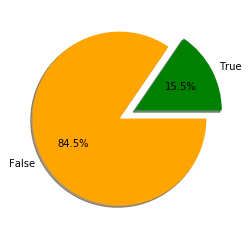

In [31]:
labels = [True, False]
sizes = [purchaser, hangAround]
colors = ['green', 'orange']
explode = [0.2, 0]

plt.pie(sizes, labels= labels, colors= colors, autopct='%1.1f%%', shadow= True, explode=explode)
plt.show

### 真的在網站上購買者只佔15%,此種資料會造成Unbalanced,所以我們應該使用特殊的資料處理方法，避免這個問題。目前，常用的resample方法，Down sampling和Up sampling兩種，前者指將多數群體縮小他們的大小，後者指將小群體者擴充他們的數目。我將使用這兩種方法，再重新分析此筆資料。

## Improvement 1 - Down Sampling

In [183]:
df = data.iloc[:, 0:6]
df['Revenue'] = data.iloc[:, 17]
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

df_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Revenue
8077,0,0.0,0,0.0,5,81.083333,False
1568,0,0.0,0,0.0,3,189.000000,False
462,0,0.0,1,132.0,8,445.000000,False
743,0,0.0,0,0.0,3,0.000000,False
222,0,0.0,0,0.0,4,14.000000,False


In [184]:
from sklearn.utils import resample

df_majority = df_train[df_train['Revenue'] == False]
df_minority = df_train[df_train['Revenue'] == True]

df_majority_downsample = resample(df_majority, 
                                 replace=True,     
                                 n_samples=1333,    
                                 random_state=123) 
df_train = pd.concat([df_majority_downsample, df_minority])

In [185]:
df_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Revenue
11043,0,0.0,0,0.0,1,0.000000,False
11056,1,28.5,1,0.0,315,11232.656910,False
6224,0,0.0,0,0.0,12,599.613333,False
9313,0,0.0,0,0.0,49,2259.047619,False
3271,7,89.9,3,84.0,58,2787.250000,False


In [205]:
X_train = df_train.iloc[:, 0:6]
y_train = df_train.iloc[:, 6]
X_test = df_test.iloc[:, 0:6]
y_test = df_test.iloc[:, 6]

In [206]:
print (df_train.Revenue.value_counts())

True     1333
False    1333
Name: Revenue, dtype: int64


#### 藉由uper sampling, 可以獲得balanced的input

In [207]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [208]:
y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.6336847796701811


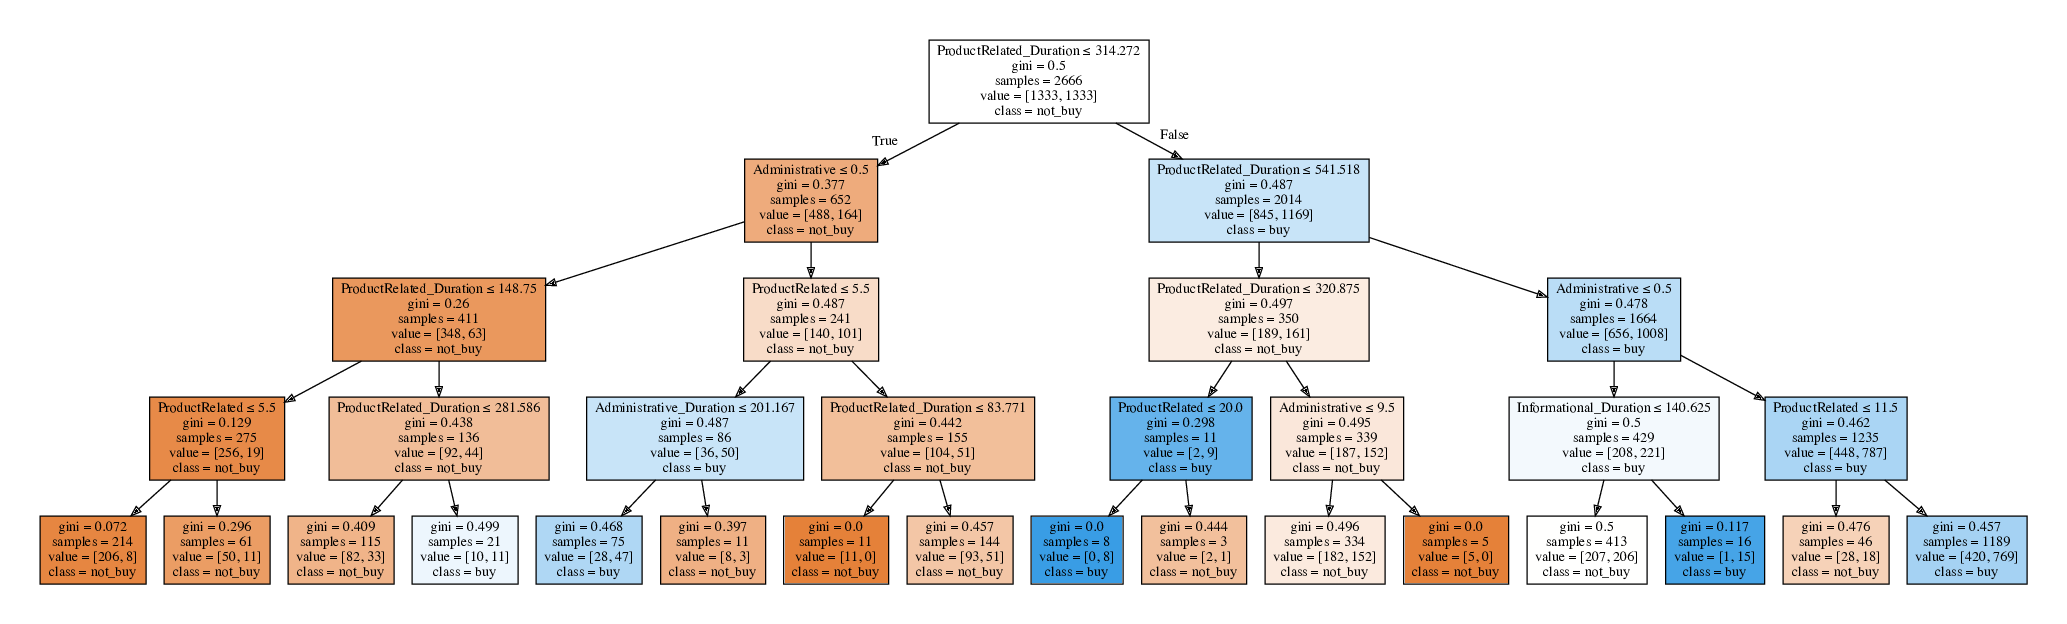

In [209]:
dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(X_train),
                class_names=['not_buy','buy'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_pdf("Decison_tree_based_on_section_underSample.pdf")
WImage(filename = 'Decison_tree_based_on_section_underSample.pdf')

### Discussion

#### 雖然準確率大幅下降，但是此模型比較具有參考性，因為此模型可以預測出潛在的買家。

### <Down Sampling 分析> 如何增加購買量？

### 1. 此棵樹往右偏，也就是右邊的買家比較多，最後影響消費者的竟是product related，也就是他們比較不同產品越久，越有可能會買那樣產品，這個結果和常識相反。所以如果公司想要提高銷售量，應該反而讓使用者比較不同場品。

### 2. 公司錯過最大部分的買家就是product related duration於148-281區間的消費者，有兩百多個sample，所以公司應個針對他們進行促銷，因為群體夠大，所以對公司而言頗划算。

##### ------------------------------------------------------------------------------------------------

## Improvement 2 - Up sampling

### 因為Down Sampling可能會remove重要的資料，所以可以考慮使用Up casting，以下講使用後者重新分析。

In [210]:
df = data.iloc[:, 0:6]
df['Revenue'] = data.iloc[:, 17]
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [211]:
from sklearn.utils import resample

df_majority = df_train[df_train['Revenue'] == False]
df_minority = df_train[df_train['Revenue'] == True]

df_mainority_upsample = resample(df_minority, 
                                 replace=True,     
                                 n_samples=7298,    
                                 random_state=123) 
df_train = pd.concat([df_majority, df_mainority_upsample])

print (df_train.Revenue.value_counts())

True     7298
False    7298
Name: Revenue, dtype: int64


In [212]:
X_train = df_train.iloc[:, 0:6]
y_train = df_train.iloc[:, 6]
X_test = df_test.iloc[:, 0:6]
y_test = df_test.iloc[:, 6]

In [213]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [214]:
y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.6304406596377399


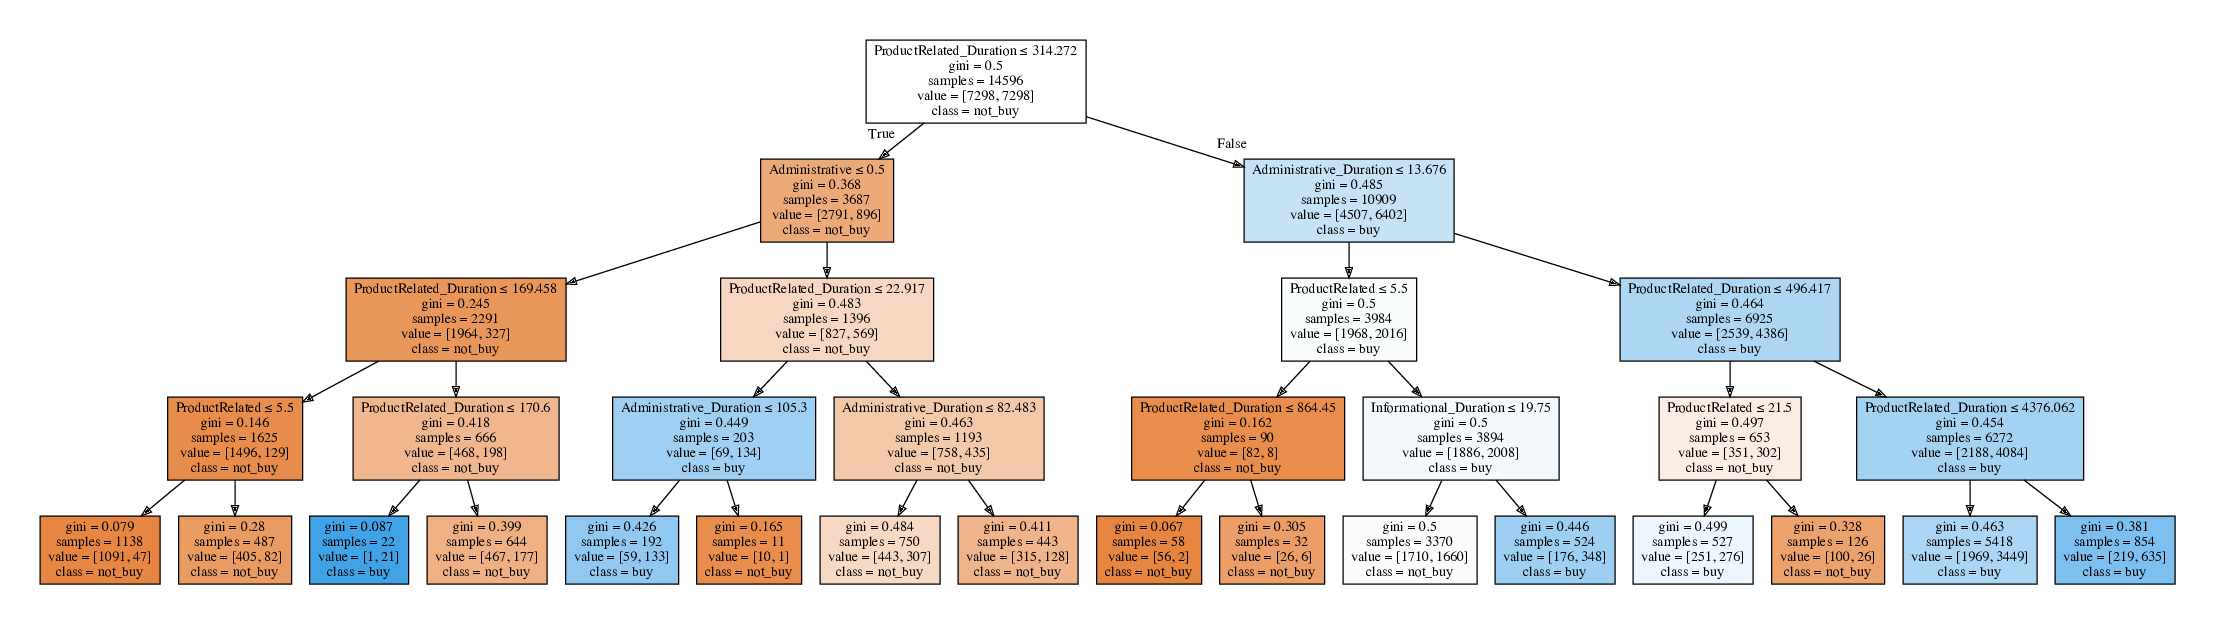

In [215]:
dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(X_train),
                class_names=['not_buy','buy'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_pdf("Decison_tree_based_on_section_downSample.pdf")
WImage(filename = 'Decison_tree_based_on_section_downSample.pdf')

### Discussion

#### 使用down sample方法，準確率略低於uder sample，可能原因是因為過度擴充資料，有可能出現overfitting狀況。雖然這兩個資料處理的方法都比原方法(直接使用decision tree)低，但是準確率也有六成，依然可以有預測的價值。

### <Up Sampling 分析> 如何增加購買量？

### 1. 這棵樹如果單就購買者而言，整棵樹往右傾斜，也就是單使用者花越多時間在product related時，表示他越可能會購買。換句花說，雖然使用者一直交互比較，但是實際上，購買的可能性更高，反而是只看單項產品的可能不會想要購買。

### 2. 知道潛在用戶後，我們想知道誰會購買產品，發現如果一直看information的用戶很可能會購買，因為表示很有興趣。所以，公司針對這種人應該有更詳盡的information,吸引他們駐留，更有機會會賣出。

### 3. 發現如果在product related觀看很久的人，數據表示他們很有可能會買，因為sample數超過6000，所以其實公司可以很有信心留著這些買家。換個角度，公司可以針對這些買家，提高些許費用，再利用這些提高的費用回饋給猶豫的買家，也就是樹的左側買家，這樣對整體銷售量會有幫助。其實，這種做法Amazon也有使用，每個會員看到的價錢其實不一定相同，所以此種做法其他有一定合理性

### 心得

### 這次的作業有個體悟，正確率不代表一切。即是模型正確率下降，有可能卻更有參考價值，一昧的追求高正確率在特定狀況下並沒有意義。